<a href="https://www.kaggle.com/code/rajatraj0502/ft-global-business-school-top-100-mba-ranking-2023?scriptVersionId=138828087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [183]:
import os
import pandas as pd

# Specify the file path using raw string or double backslashes
file_path = r'D:\Download\FT_ranking_2023\export-ranking-mba-2023.xlsx'
df = pd.read_excel(file_path)



In [184]:
# Check the shape of the DataFrame
df.shape


(100, 30)

In [185]:
# Check the data types of each column
df.dtypes


Ranking                                   int64
School Name                              object
Location, by primary campus              object
Weighted salary (US$)                    object
Alumni network rank                       int64
Carbon footprint rank                     int64
International faculty (%)                object
Female faculty (%)                        int64
Female students (%)                       int64
Women on board (%)                       object
Sector diversity rank                     int64
International board (%)                  object
Faculty with doctorates (%)               int64
FT research rank                          int64
International mobility rank               int64
International course experience rank      int64
ESG and net zero teaching rank            int64
Overall satisfaction **                 float64
Value for money rank                      int64
Employed at three months  (%)            object
Salary percentage increase              

In [186]:
# Correlation analysis
# Drop non-numeric columns if any
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation between 'Ranking' and other columns
correlation = numeric_df.corr()['Ranking']

# Print the correlation values
print(correlation)



Ranking                                 1.000000
Alumni network rank                     0.602402
Carbon footprint rank                   0.289548
Female faculty (%)                      0.168305
Female students (%)                    -0.189066
Sector diversity rank                   0.123774
Faculty with doctorates (%)            -0.154273
FT research rank                        0.687542
International mobility rank            -0.003509
International course experience rank    0.225070
ESG and net zero teaching rank          0.174685
Overall satisfaction **                -0.557154
Value for money rank                   -0.291222
Salary percentage increase             -0.431440
Careers service rank                    0.570415
Aims achieved (%)                      -0.626387
Career progress rank                    0.343065
Three-year average rank                 0.948797
Rank in 2021                            0.845715
Rank in 2022                            0.909823
International studen

In [187]:
# Convert 'Weighted salary (US$)' column to numeric format
df['Weighted salary (US$)'] = df['Weighted salary (US$)'].str.replace(',', '').astype(float)

# Calculate the average weighted salary
avg_weighted_salary = df['Weighted salary (US$)'].mean()

avg_weighted_salary



152958.15

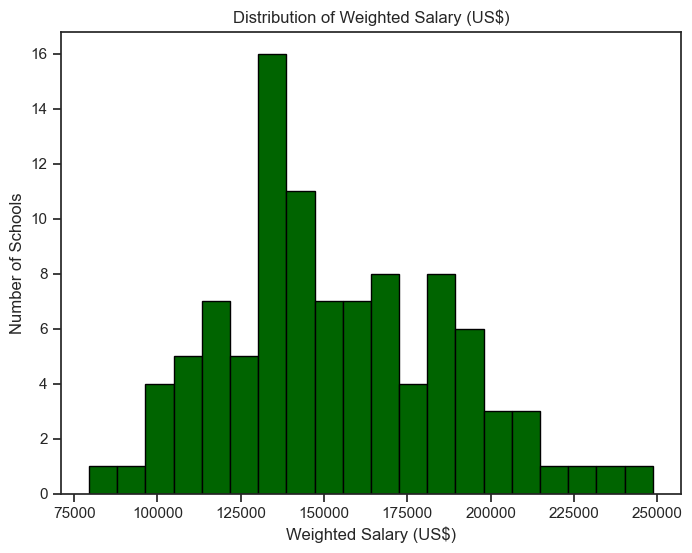

In [188]:
# Plotting histogram for 'Weighted salary (US$)'
plt.figure(figsize=(8,6))
plt.hist(df['Weighted salary (US$)'], bins=20, color='darkgreen', edgecolor='black')
plt.title('Distribution of Weighted Salary (US$)')
plt.xlabel('Weighted Salary (US$)')
plt.ylabel('Number of Schools')
plt.show()


In [189]:
# Top 10 schools with the highest 'Weighted salary (US$)'
top_10_salary_schools = df.nlargest(10, 'Weighted salary (US$)')

top_10_salary_schools[['Ranking', 'School Name', 'Weighted salary (US$)']]


,Ranking,School Name,Weighted salary (US$)
4,4,Stanford Graduate School of Business,248669.0
3,4,Harvard Business School,235019.0
0,1,Columbia Business School,226359.0
12,11,University of Chicago: Booth,218068.0
6,7,University of California at Berkeley: Haas,213321.0
8,9,"Northwestern University, Kellogg School of Man...",209337.0
10,11,MIT: Sloan,207100.0
14,15,Dartmouth College: Tuck,201451.0
1,2,Insead,198363.0
18,19,New York University: Stern,198024.0


In [190]:
# Top 10 schools with the highest 'Overall satisfaction **'
top_10_satisfaction_schools = df.nlargest(10, 'Overall satisfaction **')

top_10_satisfaction_schools[['Ranking', 'School Name', 'Overall satisfaction **']]


,Ranking,School Name,Overall satisfaction **
4,4,Stanford Graduate School of Business,9.98
7,8,Cornell University: Johnson,9.94
17,17,University of Virginia: Darden,9.71
39,40,University of Florida: Warrington,9.71
56,57,University of Maryland: Smith,9.71
14,15,Dartmouth College: Tuck,9.70
3,4,Harvard Business School,9.69
22,23,Shanghai University of Finance and Economics: ...,9.67
71,71,University of Notre Dame: Mendoza,9.63
2,3,IESE Business School,9.61


In [191]:
# Calculate the correlation between 'Weighted salary (US$)' and 'Overall satisfaction **'
salary_satisfaction_corr = df['Weighted salary (US$)'].corr(df['Overall satisfaction **'])

salary_satisfaction_corr


0.6729895052659624

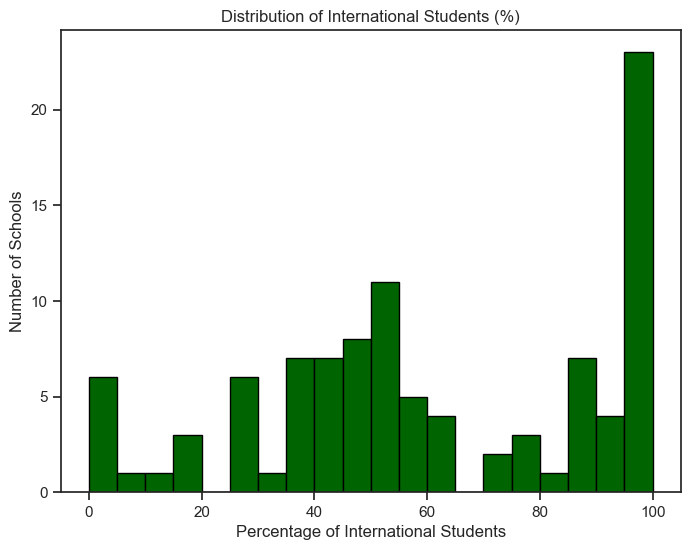

In [192]:
# Plotting histogram for 'International students (%)'
plt.figure(figsize=(8,6))
plt.hist(df['International students (%)'], bins=20, color='darkgreen', edgecolor='black')
plt.title('Distribution of International Students (%)')
plt.xlabel('Percentage of International Students')
plt.ylabel('Number of Schools')
plt.show()


In [124]:
# Calculate the average overall satisfaction across all schools
avg_overall_satisfaction = df['Overall satisfaction **'].mean()

avg_overall_satisfaction


9.016300000000003

In [125]:
# Calculate the average weighted salary by location
avg_salary_by_location = df.groupby('Location, by primary campus')['Weighted salary (US$)'].mean().sort_values(ascending=False)

avg_salary_by_location


Location, by primary campus
Italy                            192815.000000
US                               169783.173913
China                            165497.666667
India                            157034.333333
Switzerland                      156632.000000
France/Singapore                 154225.000000
Spain                            152460.250000
Singapore                        146268.000000
UK                               141995.500000
Hong Kong                        140017.666667
South Korea                      135419.000000
France/Italy/Spain/UK/Germany    130888.000000
France                           124750.000000
Germany                          120354.000000
Australia                        114803.000000
Ireland                          114689.000000
Canada                           110561.250000
Portugal                         109899.000000
Netherlands                      109023.000000
Belgium                          103168.000000
Name: Weighted salary (US$), dty

In [127]:
# Top 10 schools with the highest 'International students (%)'
top_10_international_students = df.nlargest(10, 'International students (%)')

top_10_international_students[['Ranking', 'School Name', 'International students (%)','International mobility rank']]


,Ranking,School Name,International students (%),International mobility rank
26,27,ESCP Business School,100,7
65,66,Bayes Business School (formerly Cass),100,40
85,86,Audencia,100,15
90,90,"Tias Business School, Tilburg University",100,8
31,32,IMD — International Institute for Management D...,99,3
23,23,University of Cambridge: Judge,98,16
69,70,Essec Business School,98,18
76,76,EMLyon Business School,98,12
99,100,Eada Business School Barcelona,98,30
16,17,HEC Paris,97,1


In [130]:
# Replace non-numeric values with NaN
df['International faculty (%)'] = pd.to_numeric(df['International faculty (%)'], errors='coerce')

# Top 10 schools with the highest 'International faculty (%)'
top_10_international_faculty = df.nlargest(10, 'International faculty (%)')

# Display the desired columns for the top 10 schools
top_10_international_faculty[['Ranking', 'School Name', 'International faculty (%)']]




,Ranking,School Name,International faculty (%)
31,32,IMD — International Institute for Management D...,98.0
36,37,Imperial College Business School,96.0
1,2,Insead,90.0
26,27,ESCP Business School,86.0
15,16,London Business School,85.0
23,23,University of Cambridge: Judge,84.0
59,59,University of St Gallen,84.0
54,55,Warwick Business School,80.0
79,78,Durham University Business School,80.0
69,70,Essec Business School,78.0


In [132]:
# Calculate the average 'Aims achieved (%)' across all schools
avg_aims_achieved = df['Aims achieved (%)'].mean()

avg_aims_achieved


87.41

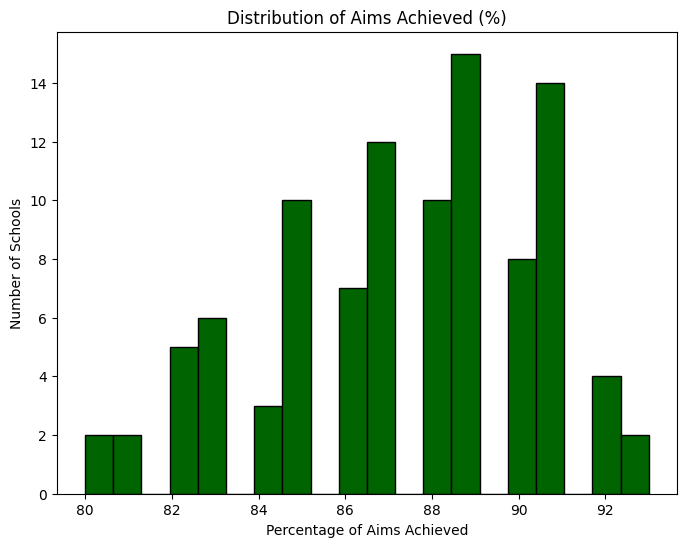

In [131]:
# Plotting histogram for 'Aims achieved (%)'
plt.figure(figsize=(8,6))
plt.hist(df['Aims achieved (%)'], bins=20, color='darkgreen', edgecolor='black')
plt.title('Distribution of Aims Achieved (%)')
plt.xlabel('Percentage of Aims Achieved')
plt.ylabel('Number of Schools')
plt.show()


In [133]:
# Top 10 schools with the highest 'Aims achieved (%)'
top_10_aims_achieved = df.nlargest(10, 'Aims achieved (%)')

top_10_aims_achieved[['Ranking', 'School Name', 'Aims achieved (%)']]


,Ranking,School Name,Aims achieved (%)
4,4,Stanford Graduate School of Business,93
42,43,Michigan State University: Broad,93
7,8,Cornell University: Johnson,92
14,15,Dartmouth College: Tuck,92
15,16,London Business School,92
25,26,University of Michigan: Ross,92
0,1,Columbia Business School,91
3,4,Harvard Business School,91
9,10,Yale School of Management,91
10,11,MIT: Sloan,91


In [134]:
# Top 10 schools with the highest 'Career progress rank'
top_10_career_progress = df.nsmallest(10, 'Career progress rank')

top_10_career_progress[['Ranking', 'School Name', 'Career progress rank']]


,Ranking,School Name,Career progress rank
50,51,Indian Institute of Management Ahmedabad,1
4,4,Stanford Graduate School of Business,2
22,23,Shanghai University of Finance and Economics: ...,3
3,4,Harvard Business School,4
10,11,MIT: Sloan,5
47,48,Fudan University School of Management,6
51,52,Indian Institute of Management Bangalore,7
75,76,Indian Institute of Management Calcutta,8
19,20,Ceibs,9
89,90,Indian Institute of Management Lucknow,10


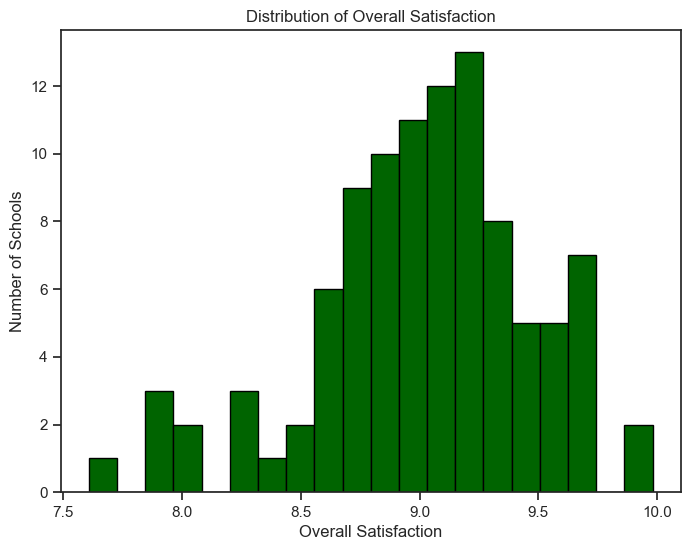

In [193]:
# Plotting histogram for 'Overall satisfaction **'
plt.figure(figsize=(8,6))
plt.hist(df['Overall satisfaction **'], bins=20, color='darkgreen', edgecolor='black')
plt.title('Distribution of Overall Satisfaction')
plt.xlabel('Overall Satisfaction')
plt.ylabel('Number of Schools')
plt.show()


In [137]:
# Top 10 schools with the highest 'Value for money rank'
top_10_value_for_money = df.nsmallest(10, 'Value for money rank')

top_10_value_for_money[['Ranking', 'School Name', 'Value for money rank']]


,Ranking,School Name,Value for money rank
68,69,University of Massachusetts Amherst: Isenberg,1
39,40,University of Florida: Warrington,2
26,27,ESCP Business School,3
91,92,Brigham Young University: Marriott,4
61,61,University of Georgia: Terry,5
5,6,SDA Bocconi School of Management,6
58,59,University of Texas at Dallas: Jindal,7
46,47,Edhec Business School,8
93,94,University College Dublin: Smurfit,9
22,23,Shanghai University of Finance and Economics: ...,10


In [139]:
# Calculate the correlation between 'Overall satisfaction **' and 'Value for money rank'
satisfaction_value_for_money_corr = df['Overall satisfaction **'].corr(df['Value for money rank'])

satisfaction_value_for_money_corr


0.1767559908322185

In [140]:
# Top 10 schools with the highest 'Faculty with doctorates (%)'
top_10_faculty_doctorates = df.nlargest(10, 'Faculty with doctorates (%)')

top_10_faculty_doctorates[['Ranking', 'School Name', 'Faculty with doctorates (%)']]


,Ranking,School Name,Faculty with doctorates (%)
2,3,IESE Business School,100
7,8,Cornell University: Johnson,100
8,9,"Northwestern University, Kellogg School of Man...",100
9,10,Yale School of Management,100
10,11,MIT: Sloan,100
13,14,UCLA Anderson School of Management,100
19,20,Ceibs,100
21,22,IE Business School,100
26,27,ESCP Business School,100
27,28,University of Oxford: Saïd,100


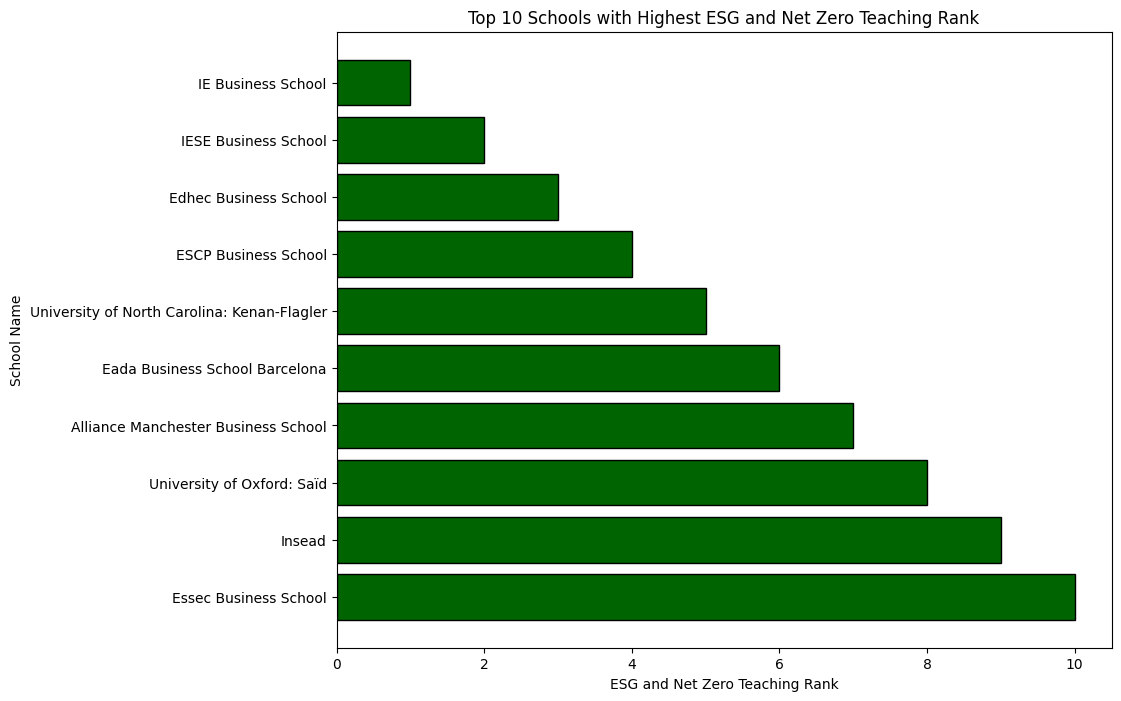

In [141]:
# Top 10 schools with the highest 'ESG and net zero teaching rank'
top_10_esg_teaching = df.nsmallest(10, 'ESG and net zero teaching rank')


# Plotting the top 10 schools with the highest 'ESG and net zero teaching rank'
plt.figure(figsize=(10,8))
plt.barh(top_10_esg_teaching['School Name'], top_10_esg_teaching['ESG and net zero teaching rank'], color='darkgreen', edgecolor='black')
plt.title('Top 10 Schools with Highest ESG and Net Zero Teaching Rank')
plt.xlabel('ESG and Net Zero Teaching Rank')
plt.ylabel('School Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the school with the highest rank at the top
plt.show()


In [142]:
# Top 10 schools with the highest 'Career service rank'
top_10_career_service = df.nsmallest(10, 'Careers service rank')

top_10_career_service[['Ranking', 'School Name', 'Careers service rank']]


,Ranking,School Name,Careers service rank
39,40,University of Florida: Warrington,1
64,64,Georgia Tech Scheller College of Business,2
7,8,Cornell University: Johnson,3
13,14,UCLA Anderson School of Management,4
2,3,IESE Business School,5
12,11,University of Chicago: Booth,6
18,19,New York University: Stern,7
48,49,Carnegie Mellon: Tepper,8
8,9,"Northwestern University, Kellogg School of Man...",9
61,61,University of Georgia: Terry,10


In [147]:
# Top 10 schools with the highest 'International mobility rank'
top_10_international_mobility = df.nsmallest(10, 'International mobility rank')

top_10_international_mobility[['Ranking', 'School Name', 'International mobility rank']]


,Ranking,School Name,International mobility rank
16,17,HEC Paris,1
59,59,University of St Gallen,2
31,32,IMD — International Institute for Management D...,3
55,56,Mannheim Business School,4
62,63,"Rotterdam School of Management, Erasmus Univer...",5
46,47,Edhec Business School,6
26,27,ESCP Business School,7
90,90,"Tias Business School, Tilburg University",8
1,2,Insead,9
97,98,Frankfurt School of Finance and Management,10


In [148]:
# Top 10 schools with the highest 'International course experience rank'
top_10_international_course = df.nsmallest(10, 'International course experience rank')

top_10_international_course[['Ranking', 'School Name', 'International course experience rank']]


,Ranking,School Name,International course experience rank
26,27,ESCP Business School,1
84,85,The Lisbon MBA Catolica | Nova,2
29,30,Esade Business School,3
85,86,Audencia,4
2,3,IESE Business School,5
69,70,Essec Business School,6
1,2,Insead,7
30,31,Washington University: Olin,8
5,6,SDA Bocconi School of Management,9
16,17,HEC Paris,10


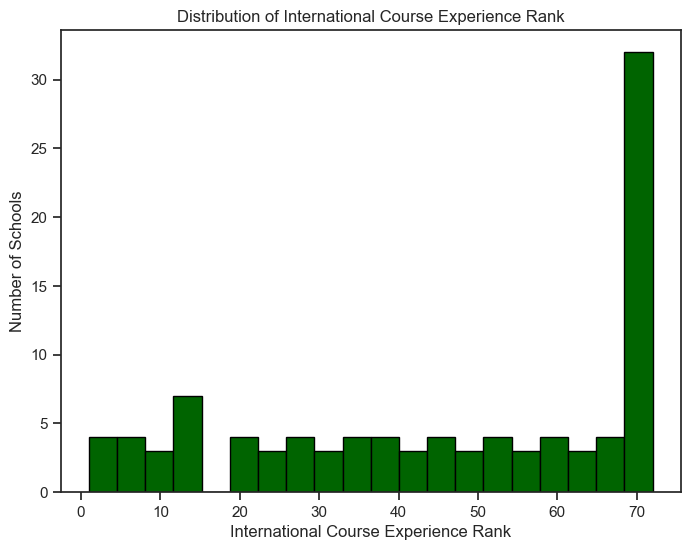

In [203]:
# Plotting histogram for 'International course experience rank'
plt.figure(figsize=(8,6))
plt.hist(df['International course experience rank'], bins=20, color='darkgreen', edgecolor='black')
plt.title('Distribution of International Course Experience Rank')
plt.xlabel('International Course Experience Rank')
plt.ylabel('Number of Schools')
plt.show()


In [206]:
# Top 10 schools with the highest 'FT research rank'
top_10_research = df.nsmallest(10, 'FT research rank')

# Print the selected columns for the top 10 schools
top_10_research[['Ranking', 'School Name', 'FT research rank']]


,Ranking,School Name,FT research rank
3,4,Harvard Business School,1
0,1,Columbia Business School,2
7,8,Cornell University: Johnson,3
12,11,University of Chicago: Booth,4
13,14,UCLA Anderson School of Management,5
58,59,University of Texas at Dallas: Jindal,6
4,4,Stanford Graduate School of Business,7
1,2,Insead,8
8,9,"Northwestern University, Kellogg School of Man...",9
11,11,Duke University's Fuqua School of Business,10


In [208]:
print(df['Weighted salary (US$)'].dtype)


float64


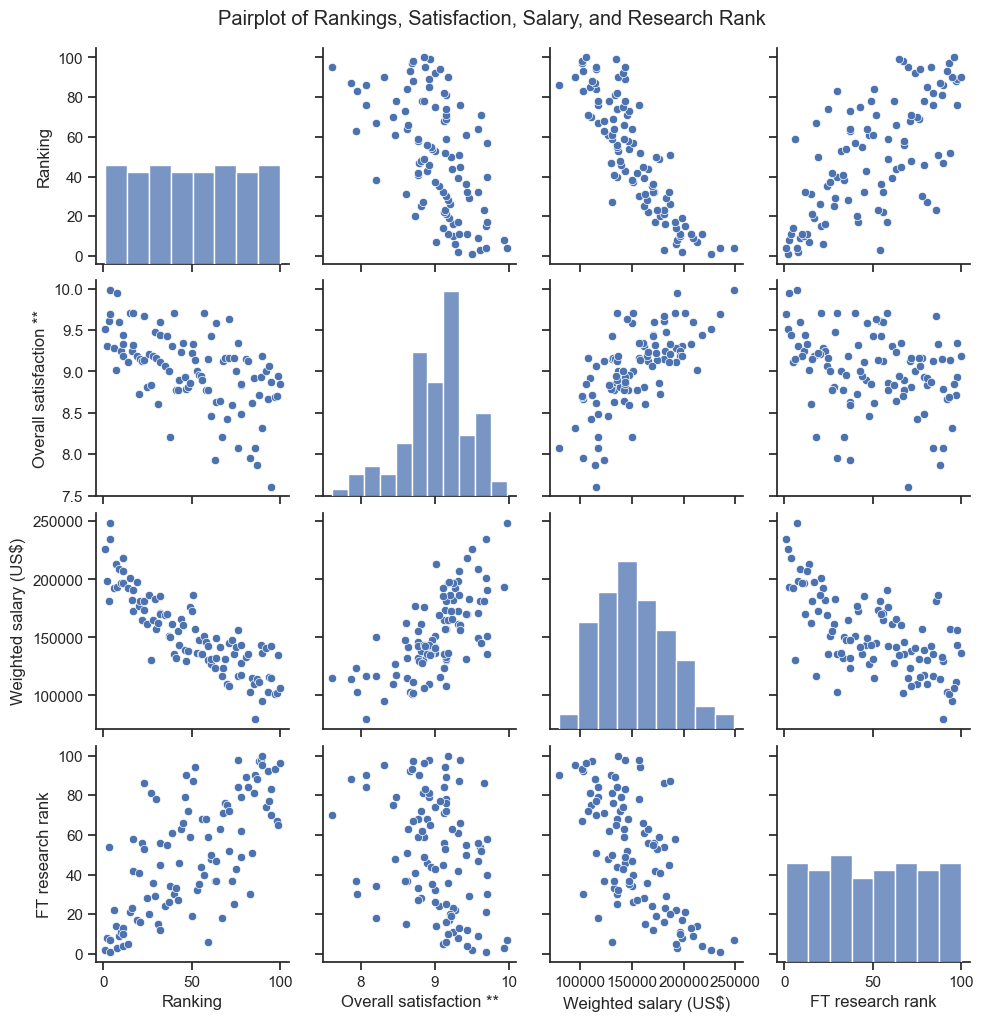

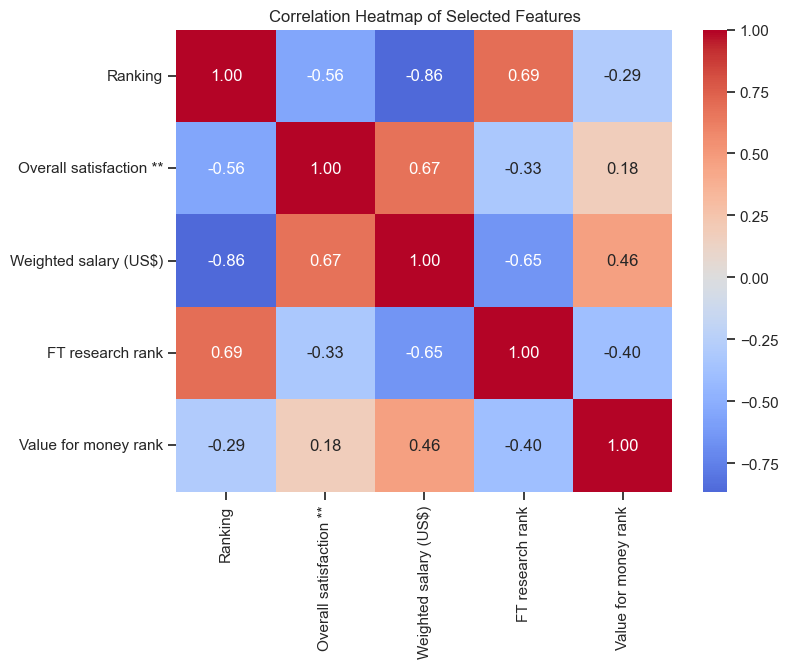

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Weighted salary (US$)' column to float
df['Weighted salary (US$)'] = df['Weighted salary (US$)'].astype(float)

# Pairplot without specifying hue
sns.set(style='ticks')
sns.pairplot(df, vars=['Ranking', 'Overall satisfaction **', 'Weighted salary (US$)', 'FT research rank'])
plt.suptitle('Pairplot of Rankings, Satisfaction, Salary, and Research Rank', y=1.02)
plt.show()

# Heatmap of correlations between selected features
selected_features = ['Ranking', 'Overall satisfaction **', 'Weighted salary (US$)', 'FT research rank', 'Value for money rank']
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


